<div style="display: flex; flex-direction: column; align-items: center; max-width: 100%; padding: 20px 0; margin: auto;">
    <img src="https://media.licdn.com/dms/image/v2/D4D3DAQFGx0XnuUvugA/image-scale_191_1128/image-scale_191_1128/0/1662458005755/nova_ims_information_management_school_cover?e=2147483647&v=beta&t=J3Q4LlZi36_4UAFhj2019QdtfXLn0kQwaX25jgaBhOQ" 
         alt="Logo" 
         style="width: 100%; max-width: 800px; height: auto; max-height: 150px; object-fit: cover; border: 3px solid hsla(120, 71.40%, 43.90%, 0.30); border-radius: 5px;">
    <div style="text-align: center; padding: 10px 0; max-width: 800px;">
        <h5 style="margin: 10px 0;">This analysis is conducted as part of the <b><i>Neural and Evolutionary Learning</i></b> course, a component of the Master's program in Data Science and Advanced Analytics at the <b><u>Nova Information Management School</u></b>.</h5>
    </div>
    <h1 style="color: hsla(120, 71.40%, 43.90%, 0.30); margin: 10px 0;"><b>Predict the Crude Protein Weight</b></h1>
</div>

<div style="text-align: center; margin: 20px 0;">
    <h3 style="margin-bottom: 15px;"><u>Group 22</u></h3>
    <table style="margin: 0 auto; border-collapse: collapse; width: 80%; max-width: 500px;">
        <thead>
            <tr>
                <th style="border-bottom: 1px solid #ddd; padding: 8px;">Student Name</th>
                <th style="border-bottom: 1px solid #ddd; padding: 8px;">Student ID</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">Catarina Nunes</td>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">20230083</td>
            </tr>
            <tr>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">Sofia Jacinto</td>
                <td style="border-bottom: 1px solid #ddd; padding: 8px;">20240598</td>
            </tr>
            <tr>
                <td style="padding: 8px;">José Cavaco</td>
                <td style="padding: 8px;"> 20240513</td>
            </tr>
        </tbody>
    </table>
</div>

<a id="idx"></a>
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Index</h1>
</div>

1. [Preprocessing the data](#preprocessing)
2. [Choosing the method and parameters](#method-selection)
3. [Estimating the predictive error](#error-estimation)
4. [Inducing the final model](#model-induction)
5. [Testing the final model](#final-testing)

#### Metadata

|Feature |Definition|
|----|-----|
|wing_tag |Chicken unique ID|
|weight |The chicken total weight|
|hot_carcass_weight |The weight of the carcass immediately after slaughter|
|carcass_weight_with_head_and_legs |The weight of the carcass including the head and legs|
|cold_carcass_weight| The weight of the carcass after cooling|
|breast_weight |The weight of the breast meat of the chicken|
|thigh_weight |The weight of the thigh meat of the chicken|
|spleen |The weight of the chicken’s spleen|
|liver |The weight of the chicken’s liver|
|heart |The weight of the chicken’s heart|
|intestine |The weight of the chicken’s intestine|
|empty_muscular_stomach| Indicates the presence or absence of the empty muscular stomach of the chicken|
|glandular_stomach |The weight of the chicken’s glandular stomach|
|crude_protein| The weight of crude protein in the carcass|
|ether_extract |The weight of ether extract, which measures the total fat in the carcass|

#### Imports & Settings

In [1]:
#pip install gsgp_slim

In [2]:
# pip install slim_gsgp

In [3]:
#pip install -r requirements.txt

In [4]:
# Imports
import numpy as np
import pandas as pd

import os
import pickle
import datetime
import torch
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from itertools import product
import gc

from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import wilcoxon, friedmanchisquare

from collections import Counter
from sklearn.metrics import mean_squared_error
import scikit_posthocs as sp

import warnings
warnings.filterwarnings('ignore')

In [5]:
from slim.main_gp import gp
from slim_gsgp.main_gsgp import gsgp
from slim_gsgp.main_slim import slim
from slim_gsgp.datasets.data_loader import *
from slim.evaluators.fitness_functions import rmse
from slim.utils.utils import train_test_split

C:\Users\catar\AppData\Local\Temp\ipykernel_22340\2942353660.py:1: DeprecationWarning: The `gsgp_slim` package is deprecated. Please use the `slim_gsgp` package instead: https://pypi.org/project/slim_gsgp/
  from slim.main_gp import gp


In [6]:
seed = 42
np.random.seed(seed)
random.seed(seed)

In [7]:
train_color = 'blue'
test_color = 'orange'

In [8]:
#! ls

#### Helpfull Functions

In [9]:
def plot_boxplots(df_clients, columns):
    """
    Plot multiple boxplots horizontally with scrolling enabled.
    """
    n_cols = len(columns)
    
    fig = make_subplots(
        rows=1,
        cols=n_cols,
        shared_yaxes=False,
        horizontal_spacing=0.05,  # space between boxplots
        subplot_titles=[col.replace("_", " ").title() for col in columns]
    )

    for idx, column in enumerate(columns, start=1):
        fig.add_trace(
            go.Box(
                y=df_clients[column],
                name=column.replace("_", " ").title(),
                boxpoints='outliers',  # only show outliers
                whiskerwidth=0.2,
                marker_color='mediumseagreen',
                line_color='seagreen',
                fillcolor='rgba(60,179,113,0.3)',
                marker_size=4
            ),
            row=1,
            col=idx
        )

    fig.update_layout(
        title='Outliers Analysis',
        title_font_size=24,
        plot_bgcolor='white',
        height=600,
        width=300 * n_cols,  # make width proportional to number of boxplots
        showlegend=False
    )

    fig.update_yaxes(zeroline=False)

    fig.show()

### <a id="preprocessing"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">Preprocessing the data</h3>
</div>

[Back to Index](#idx)

#### Data Loading

In [10]:
df = pd.read_excel(r"data\sustavianfeed.xlsx")

c:\Users\catar\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\catar\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [11]:
df.head()

,WING TAG,WEIGHT,HOT CARCASS WEIGHT,CARCASS WEIGHT WITH HEAD AND LEGS,COLD CARCASS WEIGHT,BREAST WEIGHT (2),THIGH WEIGHT (2),SPLEEN,LIVER,HEART,INTESTINE,EMPTY MUSCULAR STOMACH,GLANDULAR STOMACH,CRUDE PROTEIN,ETHER EXTRACT
0,G403,2223.3,1429.6,1725.6,1394.0,214.0,489.4,3.716,38.636,9.305,123.171,/,13.170,86.105469,0.38
1,G439,2201.9,1450.2,1769.8,1405.4,236.0,538.7,3.494,34.725,10.084,71.800,45.273,9.781,86.143472,1.66
2,G454,2159.9,1398.4,1724.9,1461.7,241.8,512.1,4.023,31.932,10.635,61.380,/,6.217,86.416898,0.98
3,G465,2198.7,1473.9,1800.4,1425.1,227.7,549.9,3.087,32.326,11.927,64.879,35.861,8.358,85.959935,1.10
4,G428,2003.2,1291.2,1581.6,1260.1,224.7,473.2,3.723,30.105,9.855,68.562,36.526,7.572,81.693637,6.34


lets rename the columns according to the metadata:

In [12]:
# column name mapping
column_mapping = {
    'WING TAG': 'wing_tag',
    'WEIGHT': 'weight',
    'HOT CARCASS WEIGHT': 'hot_carcass_weight',
    'CARCASS WEIGHT WITH HEAD AND LEGS': 'carcass_weight_with_head_and_legs',
    'COLD CARCASS WEIGHT': 'cold_carcass_weight',
    'BREAST WEIGHT (2)': 'breast_weight',
    'THIGH WEIGHT (2)': 'thigh_weight',
    'SPLEEN': 'spleen',
    'LIVER': 'liver',
    'HEART': 'heart',
    'INTESTINE': 'intestine',
    'EMPTY MUSCULAR STOMACH': 'empty_muscular_stomach',
    'GLANDULAR STOMACH': 'glandular_stomach',
    'CRUDE PROTEIN': 'crude_protein',
    'ETHER EXTRACT': 'ether_extract'
}

df = df.rename(columns=column_mapping)

#### Descriptive Summary

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,96.0,2339.682292,200.943424,1968.400000,2201.775000,2299.500000,2473.800000,2890.500000
hot_carcass_weight,96.0,1521.955208,144.126939,1284.900000,1425.775000,1493.050000,1608.400000,1929.400000
carcass_weight_with_head_and_legs,96.0,1833.378125,154.000550,1554.400000,1723.800000,1809.400000,1922.725000,2262.800000
cold_carcass_weight,96.0,1481.479167,142.830115,1252.600000,1380.825000,1452.800000,1573.700000,1891.700000
breast_weight,96.0,234.116667,37.818405,177.100000,218.775000,231.550000,243.275000,533.200000
thigh_weight,96.0,542.205208,60.994468,177.800000,508.225000,538.100000,573.850000,690.600000
spleen,96.0,4.219917,0.998836,2.464000,3.534250,4.048000,4.817000,7.758000
liver,96.0,36.781427,5.438894,25.916000,33.053000,35.936000,40.485000,53.133000
heart,96.0,12.059240,1.932239,8.561000,10.584250,11.679000,13.449750,17.194000
intestine,96.0,69.149156,11.727467,44.133000,62.274250,68.019500,75.103000,123.171000


In [14]:
df.describe(include='O').T

,count,unique,top,freq
wing_tag,96,96,G403,1
empty_muscular_stomach,96,91,/,5


In [15]:
df.isna().sum()

wing_tag                             0
weight                               0
hot_carcass_weight                   0
carcass_weight_with_head_and_legs    0
cold_carcass_weight                  0
breast_weight                        0
thigh_weight                         0
spleen                               0
liver                                0
heart                                0
intestine                            0
empty_muscular_stomach               0
glandular_stomach                    0
crude_protein                        0
ether_extract                        0
dtype: int64

- no missing values
- `wing_tag` uniquely represents each chicken so can be placed as index.

In [16]:
df.set_index('wing_tag', inplace = True)

In [17]:
df.duplicated().sum()

0

#### Data Types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, G403 to V428
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   weight                             96 non-null     float64
 1   hot_carcass_weight                 96 non-null     float64
 2   carcass_weight_with_head_and_legs  96 non-null     float64
 3   cold_carcass_weight                96 non-null     float64
 4   breast_weight                      96 non-null     float64
 5   thigh_weight                       96 non-null     float64
 6   spleen                             96 non-null     float64
 7   liver                              96 non-null     float64
 8   heart                              96 non-null     float64
 9   intestine                          96 non-null     float64
 10  empty_muscular_stomach             96 non-null     object 
 11  glandular_stomach                  96 non-null     float64
 

In [19]:
df['empty_muscular_stomach'].unique()

array(['/', 45.273, 35.861, 36.526, 40.993, 40.949, 45.323, 42.091,
       49.148, 46.807, 31.103, 49.057, 39.621, 43.128, 53.485, 38.836,
       44.487, 47.665, 50.006, 43.695, 59.547, 61.306, 61.702, 60.063,
       45.428, 53.456, 43.586, 49.648, 63.571, 47.523, 63.86, 64.538,
       42.852, 50.119, 32.665, 35.164, 46.656, 44.855, 44.962, 51.851,
       45.507, 50.136, 43.821, 66.616, 29.712, 40.936, 52.518, 35.408,
       51.944, 41.483, 56.23, 55.663, 42.66, 32.12, 43.964, 75.767,
       45.327, 42.129, 47.964, 44.811, 32.599, 32.947, 38.155, 48.009,
       56.347, 59.583, 51.322, 58.708, 41.917, 40.425, 51.903, 56.698,
       40.7, 45.321, 55.671, 68.602, 44.006, 54.71, 45.636, 34.692,
       48.933, 45.045, 48.02, 42.632, 45.366, 52.457, 49.281, 54.021,
       42.173, 49.7, 46.816], dtype=object)

The metadata for the column `empty_muscular_stomach` specifies that it should be a binary flag, '_Indicates the presence or absence of the empty muscular stomach of the chicken_'. However, the data contains a '/' that represents 'yes' for an empty stomach, and other values that indicate that the stomach is not empty, such as percentages or grams. We will evaluate whether it is more valuable to maintain this column as a float or a binary flag, based on its correlation with the target variable. Ultimately, we plan to adhere to the guidance provided in the metadata, but lets see:

In [20]:
df['empty_muscular_stomach_bin'] = np.where(
    df['empty_muscular_stomach'] == '/', 1, 0
).astype(int)

In [21]:
df['empty_muscular_stomach_float'] = df['empty_muscular_stomach'].replace('/', 0).astype(float)

#### Outliers

In [22]:
plot_boxplots(df, df.columns)

Given the presence of outliers and the small size of the dataset, the best approach is to incorporate the Robust Scaler into the model's pipeline.

#### Correlations

c:\Users\catar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

c:\Users\catar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.

c:\Users\catar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning:

backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.



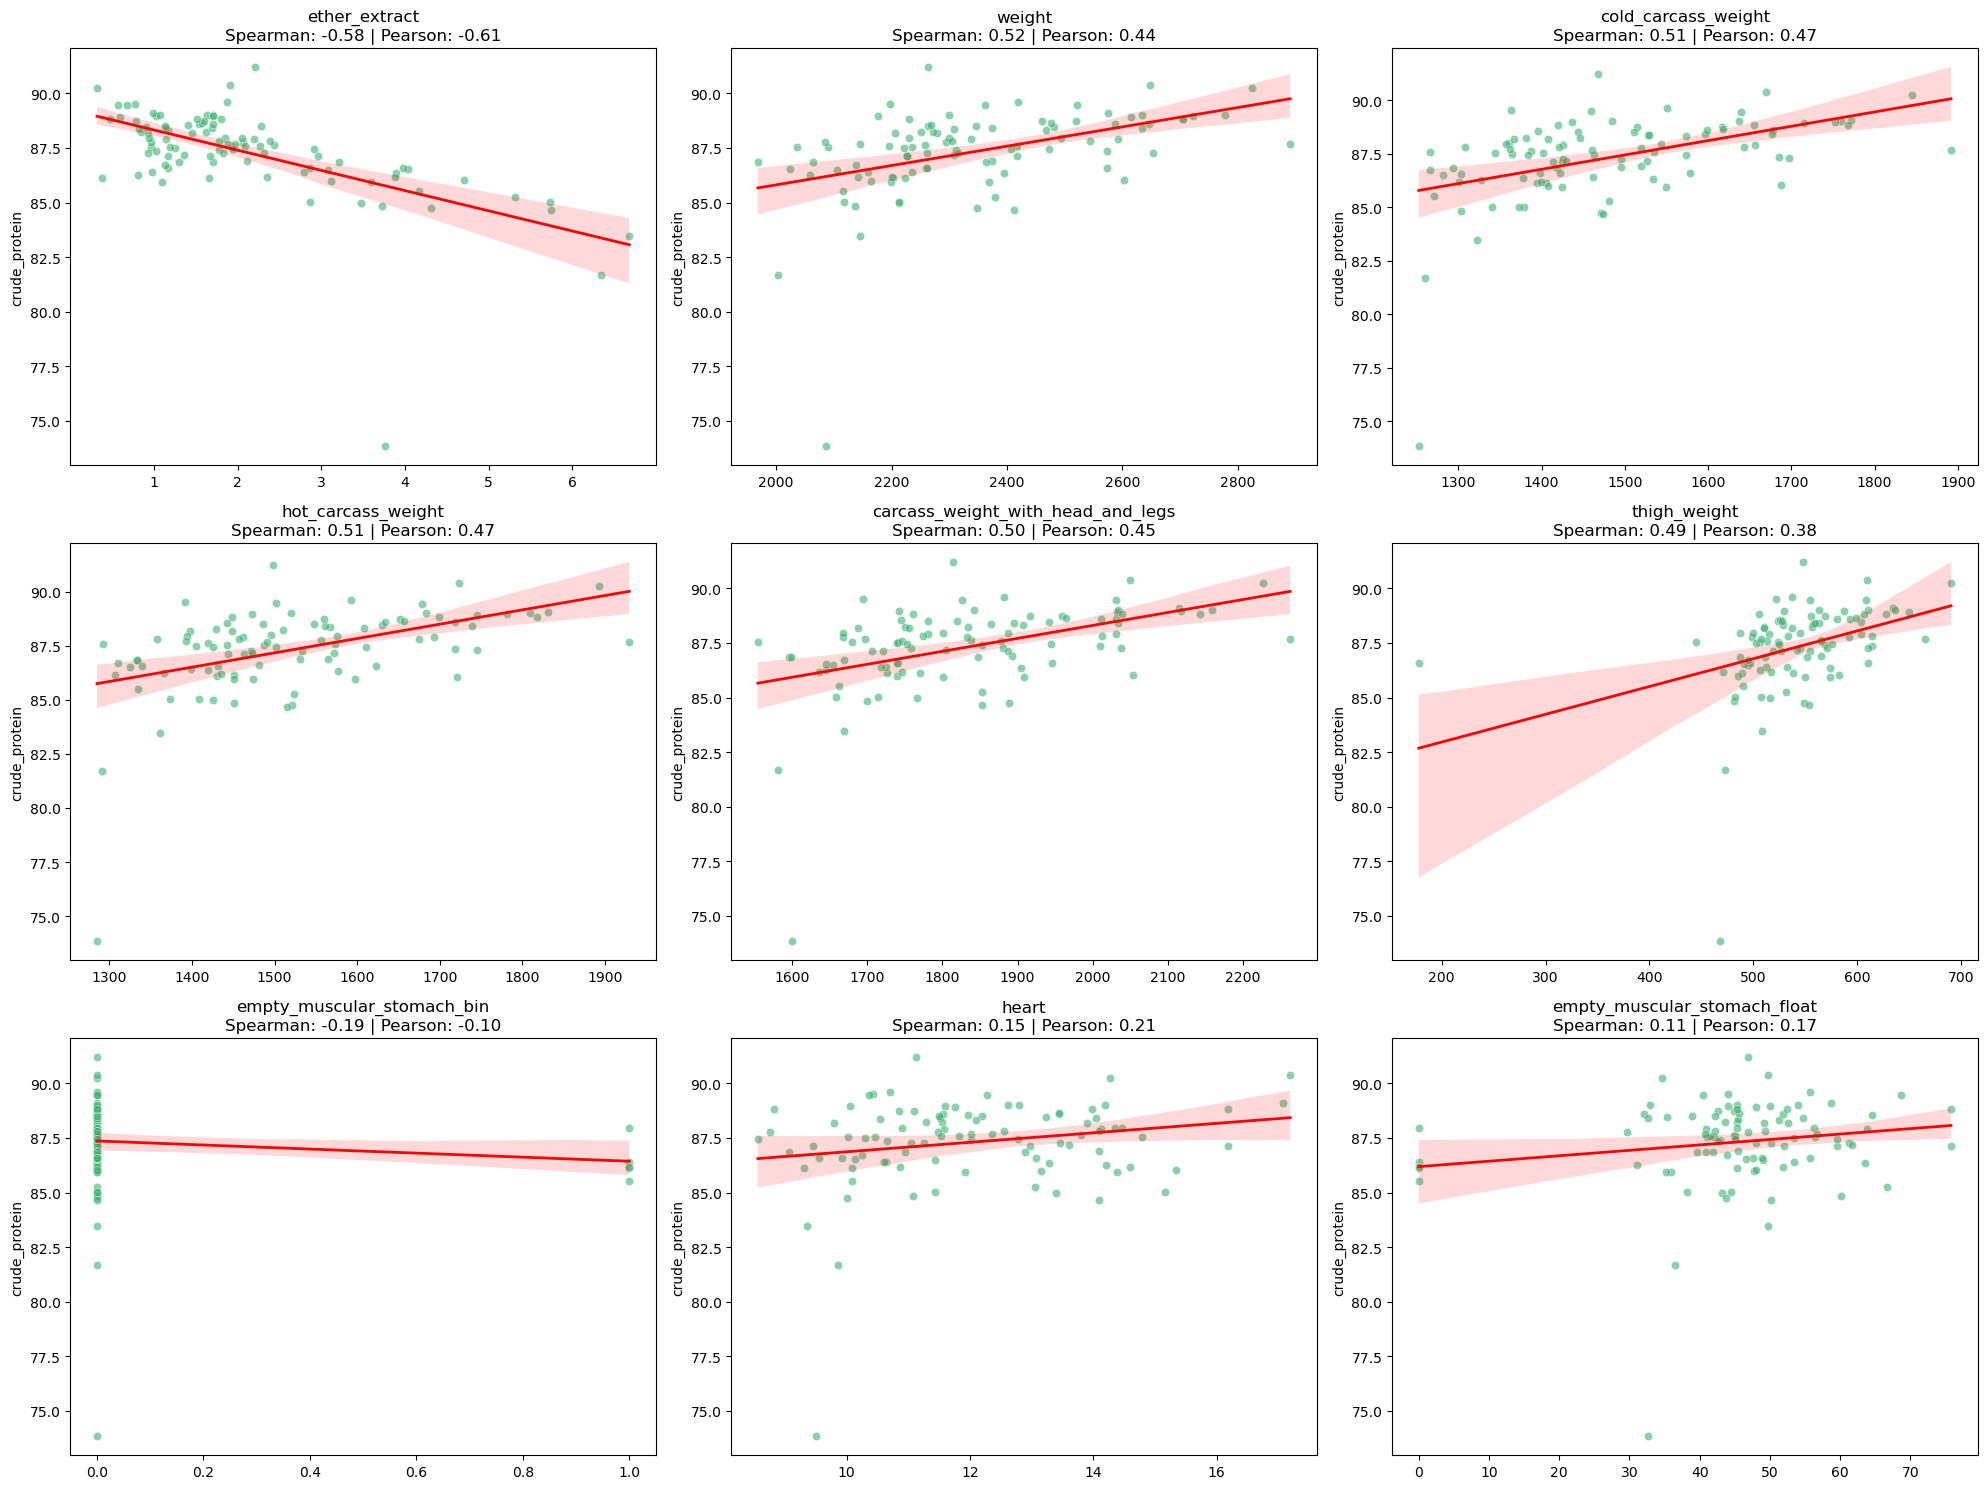

Correlations with crude_protein:


,spearman,pearson
feature,,
ether_extract,-0.582762,-0.612023
weight,0.519340,0.435335
cold_carcass_weight,0.509838,0.467681
hot_carcass_weight,0.508193,0.466773
carcass_weight_with_head_and_legs,0.498589,0.446827
thigh_weight,0.485786,0.379469
empty_muscular_stomach_bin,-0.190323,-0.101427
heart,0.153040,0.205162
liver,0.145050,0.123440


In [23]:
#code adapted from previous work

# correlations with crude_protein
target = 'crude_protein'
numeric_cols = df.select_dtypes(include=['number']).columns
features = [col for col in numeric_cols if col != target] 

# both correlation types
corr_data = df[features + [target]]  # Note: target needs to be in a list
spearman_corr = corr_data.corr(method='spearman')[target]
pearson_corr = corr_data.corr(method='pearson')[target]

# Combine into a DataFrame for easier analysis
corr_df = pd.DataFrame({
    'feature': features,
    'spearman': spearman_corr[features],
    'pearson': pearson_corr[features]
}).sort_values(by='spearman', key=abs, ascending=False)

# Set threshold (adjust as needed)
threshold = 0.15
significant_features = corr_df[(abs(corr_df['spearman']) >= threshold) | 
                             (abs(corr_df['pearson']) >= threshold)]

# Plot settings
num_features = len(significant_features)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
if num_features > 0:  # Only proceed if there are significant features
    if num_rows == 1:
        axes = axes.reshape(1, -1)  # Ensure axes is always 2D

    # Plot each significant feature against target
    for i, (_, row) in enumerate(significant_features.iterrows()):
        ax = axes[i//num_cols, i%num_cols]
        feature = row['feature']
        
        # Scatterplot
        sns.scatterplot(x=df[feature], y=df[target], ax=ax, color='mediumseagreen', alpha=0.6)
        
        # Regression line if possible
        if df[feature].nunique() > 1:
            try:
                sns.regplot(x=df[feature], y=df[target], ax=ax, 
                            scatter=False, color='red', line_kws={'linewidth':2})
            except:
                pass
        
        # Add correlation info to title
        ax.set_title(f"{feature}\nSpearman: {row['spearman']:.2f} | Pearson: {row['pearson']:.2f}")
        ax.set_xlabel('')
        ax.set_ylabel('crude_protein')

    # Hide empty subplots
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

    # Show correlation table
    corr_df = corr_df.set_index('feature')
    print("Correlations with crude_protein:")
    display(corr_df.style.background_gradient(cmap='BuGn', vmin=-1, vmax=1))
else:
    print(f"No features found with correlation >= {threshold}")

When  picking features for modeling, it's crucial to give a special focus on those that have the strongest correlation with the target variable, since they tend to boost predictive performance the most.

In this scenario, features like ether_extract, weight, cold_carcass_weight, hot_carcass_weight, carcass_weight_with_head_and_legs, and thigh_weight stand out with the highest correlation to the target, making them key candidates for inclusion. 

But just because a feature has a high correlation doesn’t mean thy are useless, features that might seem less significant on their own—like heart, liver, or breast_weight—can still bring value when paired with others, especially in non-linear models or when considering interaction effects. So, while the strongest features lay a solid groundwork, it’s wise not to overlook the weaker ones too quickly without doing some additional testing in the modeling process.

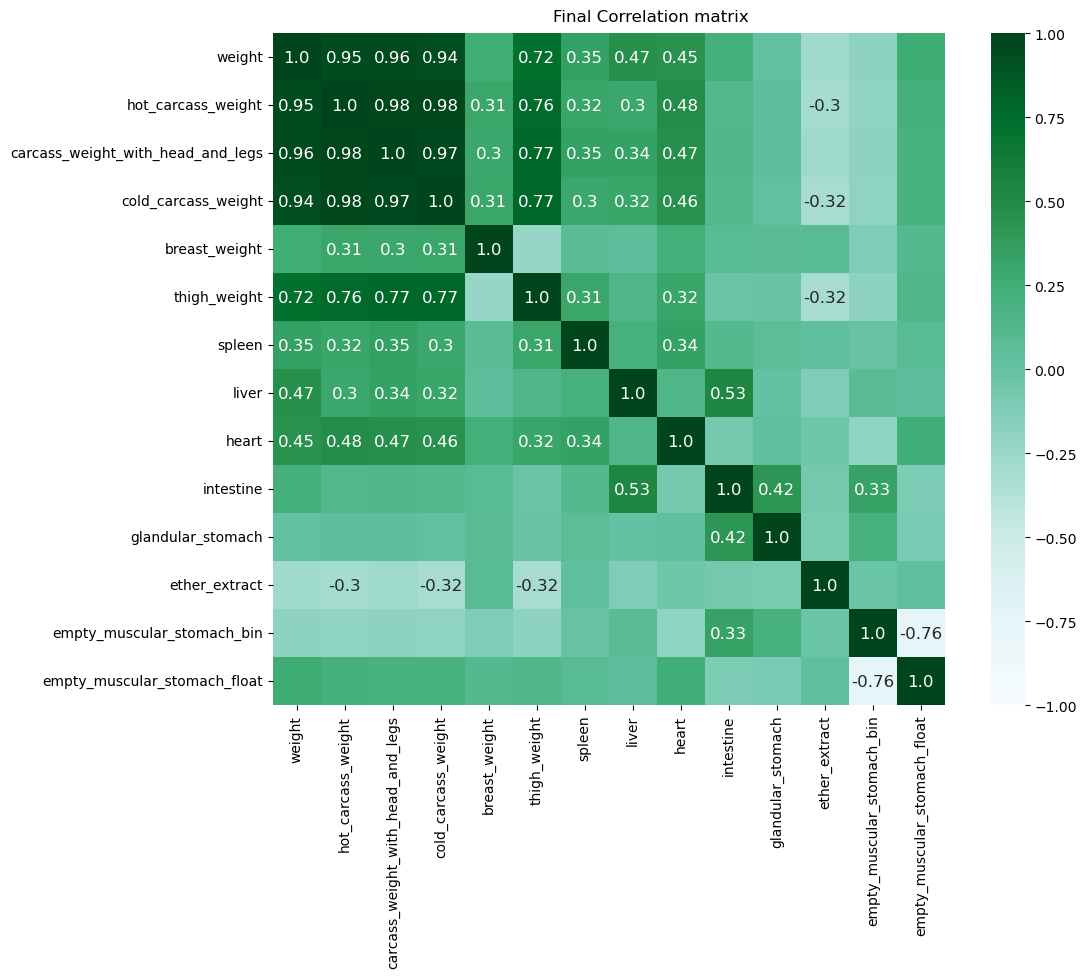

In [24]:
corr = df[features].corr().round(2)
fig = plt.figure(figsize=(12, 8))

# annotation matrix - values above |0.3| will appear in the plot
mask_annot = np.absolute(corr.values) >= 0.3
annot = np.where(mask_annot, corr.values, np.full(corr.shape, ''))
sns.heatmap(data = corr, annot = annot, cmap = 'BuGn', fmt = 's', vmin = -1, vmax = 1, center = 0, square = True, linewidths = 0, annot_kws = {'size': 12})

fig.subplots_adjust(top = 0.95)
fig.suptitle('Final Correlation matrix');

The correlation matrix reveals some strong linear relationships among various variables, which points to possible redundancy in the dataset:

- For example, weight, hot_carcass_weight, carcass_weight_with_head_and_legs, and cold_carcass_weight are all highly correlated with each other, with values ranging from 0.94 to 0.98, very high. This indicates that including all four in a model or analysis could lead to multicollinearity issues.

- So, to simplify, we might want to keep just one representative variable—like hot_carcass_weight—and leave the others out.. Similarly, thigh_weight has a strong correlation with the carcass weights (up to 0.77), suggesting it could also be somewhat redundant if we already have carcass weight in the mix.



We are going to keep `empty_muscular_stomach_bin` since it has a better correlation witht the target.

In [25]:
df['empty_muscular_stomach'] = df['empty_muscular_stomach_bin'] 

In [26]:
df = df.drop(columns=['empty_muscular_stomach_float', 'empty_muscular_stomach_bin'])

`IMPORTANT:`the project description spcifically says "predict the crude protein weight using the remaining features in the dataset, excluding the animal ID." so we corrected the `empty_muscular_stomach` but we will not perform feature selection at this stage, basically we ll have this initial approach were we will test the models with all the features. If futher instructions state otherwise we will follow the analysis above.

### <a id="method-selection"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">Choosing the method and parameters for each model</h3>
</div>

[Back to Index](#idx)

- [1. Nested cross-validation vs. Monte Carlo cross-validation](#method) 
- [2. Genetic Programming (GP)](#gp) - Delivery 1 (Done)
- [3. Geometric Semantic Geometric Programming (GSGP)](#gsgp) - Delivery 2 (Done)
- [4. Semantic Learning algorithm with Inflate and deflate Mutations (SLIM)](#slim) - Delivery 3 (Done)
- [5. Neural Network (NN)](#nn)
- [6. NeuroEvolution of Augmenting Topologies (NEAT)](#neat)

#### <a id="method"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">1. Nested cross-validation vs. Monte Carlo cross-validatio</h4>
</div>

[Back to Index](#idx)

In this project, we opted for **nested cross-validation (nested CV)** as our dataset partitioning strategy for both model selection (hyperparameter tuning) and performance evaluation.

This decision was based on the following considerations:

1. **Final Comparative Evaluation Across Algorithms**  
   At the end of the project, _"the same partitions should be used across all the algorithms to be studied"_, we will compare Genetic Programming (GP) and Geometric Semantic Genetic Programming (GSGP) and other machine learning algorithms.  
   To ensure a **fair and unbiased comparison**, the **same dataset partitions** must be used across all algorithms (are all evaluated under the same conditions basically) - Nested CV provides a systematic and reproducible way to maintain this consistency.

2. **Separation of Concerns: Tuning vs. Evaluation**  
   Nested CV explicitly separates the hyperparameter optimization (inner loop) from the model evaluation (outer loop).  
   This avoids **information leakage** and reduces the risk of **overfitting during model selection**, which is particularly relevant for algorithms like GP that are prone to overfitting and premature convergence.
   "the advantage of doing several iterations in cross-validation is that it allows us to obtain an error estimate that is not dependent on a single data splitting and a particular choice of the training data"_ (Vanneschi & Silva, Sec. 5.3, p.130). Nested CV extends this robustness by adding an inner loop for model selection, which further reduces the risk of biased or optimistic performance estimation.

3. **Avoiding Pitfalls of Monte Carlo CV in This Context**
   Although Monte Carlo cross-validation (or repeated random subsampling) can be viewd as an alternative (Vanneschi & Silva, p.130-131), it comes with a notable limitation: _"some observations may never be selected for the test set, while others will be selected more than once"_. In this project, where a **comparative and reproducible evaluation across multiple algorithms is required**, this irregularity makes Monte Carlo CV less appropriate than nested CV.  Using a **K-Fold outer loop** (e.g., `K=10`) ensures that every instance in the dataset is used for testing exactly once, and for training K-1 times, and combined with an **inner K-Fold** (e.g., `K=5`) for tuning, this strategy enables robust **statistical comparisons** (e.g., Wilcoxon tests, Friedman + Nemenyi post-hoc), which are essential to draw valid conclusions about performance differences between models.

   The  different CV strategies may be appropriate for different phases: _"it may make sense to use 5-fold or 10-fold cross-validation for choosing the method and parameters (...) and then use Monte Carlo (...) for a thorough estimation of the error"_ (p.131).  
   However, since our pipeline includes both tuning and evaluation as part of the **same CV process**, and comparison across methods is the final goal, we apply nested CV consistently for both.

4. Despite the relatively small size of our dataset (96 instances), we argue that nested cross-validation remains a justified choice. As pointed out by Vanneschi & Silva (Section 5.3), the reliability of performance estimation is a crucial concern when data is scarce. Nested CV is particularly effective in avoiding overfitting during hyperparameter tuning, which becomes even more critical under these circumstances.

The training and test sets generated in each fold still preserve enough data to fit and evaluate meaningful models. Moreover, since the dataset is small, the computational overhead introduced by nested CV is negligible.

In summary, while some may consider using Monte Carlo cross-validation to reduce computational cost or avoid small folds, the benefits of using nested cross-validation — particularly in terms of fair model selection and unbiased generalization error estimation — outweigh the drawbacks, especially when working with limited data.


In [27]:
target = 'crude_protein'
X = df.drop(columns=[target])
y = df[target]

In [28]:
k_outer = 5
k_inner = 3
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=seed)
inner_cv = KFold(n_splits=k_inner, shuffle=True, random_state=seed)

total_instances = X.shape[0]
outer_test_size = total_instances // k_outer
outer_train_size = total_instances - outer_test_size
inner_val_size = outer_train_size // k_inner
inner_train_size = outer_train_size - inner_val_size

print(f'Total Instances:\t{total_instances}\n--')
print(f'Outer Train set:\t{outer_train_size}')
print(f'Test set:\t\t{outer_test_size}\n--')
print(f'Inner Train set:\t{inner_train_size}')
print(f'Validation set:\t\t{inner_val_size}\n')

Total Instances:	96
--
Outer Train set:	77
Test set:		19
--
Inner Train set:	52
Validation set:		25



- Dataset size: 96 samples -> GP can overfit easily on small data if trees get too big or the population too complex

In [29]:
# ===================== Nested CV Generator =====================
def nested_cv_generator(X, y, k_outer=10, k_inner=3, random_state=None):
    """ https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/"""
    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=random_state)
    for outer_train_idx, outer_test_idx in outer_cv.split(X):
        X_outer_train = X.iloc[outer_train_idx].reset_index(drop=True)
        y_outer_train = y.iloc[outer_train_idx].reset_index(drop=True)
        X_test = X.iloc[outer_test_idx].reset_index(drop=True)
        y_test = y.iloc[outer_test_idx].reset_index(drop=True)

        inner_cv = KFold(n_splits=k_inner, shuffle=True, random_state=random_state)
        inner_splits = list(inner_cv.split(X_outer_train))

        yield {
            'X_outer_train': X_outer_train,
            'y_outer_train': y_outer_train,
            'X_test': X_test,
            'y_test': y_test,
            'inner_splits': inner_splits,
        }

#### <a id="gp"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">2. Genetic Programming (GP)</h4>
</div>

[Back to Index](#idx)

> since this delivery i about GP we will keep this massive code in here to be easier to evaluate but in the final project we will do it in python file and import the function (if its ok of course) to make the notebook cleaner

| **Parameter**        | **Test Values**                                | **Why ??**                                                                                             |
| -------------------- | ----------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| `init_depth`         | `[3, 5]`                                              | Smaller initial trees (shallow depth) reduce the risk of overfitting early on. With 96 entries, you want simplicity and better generalization.  |
| `max_depth`          | `[10]`                                             | Limits the model's complexity. Deep trees overfit easily on small datasets. Capping depth avoids bloated or overly specific programs.           |
| `tree_constants`     | `[random.uniform(0, 1) for _ in range(9)] + [-1.]`    | Constants allow models to fine-tune predictions. Using a limited, balanced range prevents excessive reliance on constants (avoids "bloat").     |
| `p_constants`        | `[0.1, 0.5]`                                          | High constant probability makes the tree more about constants than structure. This is dangerous for small data — prefer 10–20% range.           |
| `tree_functions`     | `['add', 'subtract', 'multiply', 'divide']` | Basic arithmetic gives expressive power. `protected_divide` avoids runtime errors. Don’t add too many functions — it increases search space.    |
| `pop_size`           | `[20, 30, 50]`                                        | Small datasets don’t need huge populations. Lower sizes = faster runs and still enough diversity. 20–50 is a good starting point.               |
| `p_xo`               | `[0.7, 0.9]`                                          | Crossover (recombination) promotes diversity and generalization. On small data, too much crossover (close to 1.0) might disrupt good solutions. |
| `initializer`        | `"grow", "rhh"`                                       | `grow` creates variable-sized trees. `rhh` mixes it with `full`, adding diversity. `full` alone — it tends to create deep, overfit trees. |
| `elitism`            | `[True]`                                              | Keep the best solution in each generation. With few samples, losing the best-performing individual can seriously hurt performance.              |
| `n_iter`             | `30`                                                  | Reasonable trade-off between computation and convergence. Too many iterations with small data can lead to overfitting.                          |


Running the full CV 3 times with different seeds to mitigate randomness from GP (e.g., in init, selection, mutation), and get statistically more reliable average performance (like doing 30 folds total) -> common trick in evolutionary algorithms due to their stochastic nature.

> Running GP with Best Config  

Although the best-performing configuration was found after the tuning, we ended up testing it again this time with the verbose parameter so we can analyze the generations across folds more in depth - we used the **5-fold outer cross-validation** to get am unbiased estimate of how well the model would perform on completely unseen data (as we explained before) -> Again, this helps avoid the trap of getting overly optimistic results from a single lucky train-test split.

---

**Per fold Analysis: Overfitting, Bloat and Premature Convergence**

- **Outer Fold 1**

This fold showed some interesting early behavior. The algorithm converged too quickly, locking onto a solution by the second generation. Training fitness dropped from 1.03 to 0.94 right away, then had small variations for the rest of the 30 generations. That kind of 'stagnation' can mean the population lost diversity early on and didn’t explore better parts of the solution space.

There was also a hint of overfitting between generations 5 and 7—training error kept going down, but test error briefly spiked above 1.12. but in generation 10, both errors settled around 0.73, showing the model found a decently generalizable solution.

As for **bloat**, there wasn’t any. The tree sizes stayed small and consistent, growing from 5 to 7 nodes early on and holding steady -> That’s a good sign the model was penalizing complexity.


- **Outer Fold 2**

After the first generation, test fitness dropped and went around 0.4125.. by generation 11. We thibnk the model got stuck in a local minimum or converged too early, and the training fitness kept improving slightly, which again hints at some overfitting.

Tree size didn’t grow—it stayed at 5 nodes during the plateau—so the model didn’t try to increase complexity to escape the stagnation. Still, it predicted reasonably well overall, with a final RMSE of 0.8379, which isn’t bad.


- **Outer Fold 3**

This one struggled, the training fitness got better (0.7010), the test fitness stayed high—around 1.6185. This shows overfitting as the model learned the training data but failed to generalize at all. On top of that, bloat became a problem bc the trees ballooned to 29 nodes by the end, the model added to much complexity and that extra complexity didn’t help. 

Outliers in the test data, like a very low crude protein value of 73.84, probably made things worse. Since we used the robust scaler this should had helped. This extra complexity can also indicate that we have too much features and the model tries too hard to learn all the patterns, a feature selection can maybe imporve this.

- **Outer Fold 4**

This fold saw a consistent reduction in training and test fitness at the beginning, so the model was learning at first. Training error declined from 0.998 to 0.857 and test error declined from 0.77 to 0.52 from generation 0 to generation 5 wich is a positive indicators of convergence. But after generation 6 train fitness fell into a stagnation phase and test started to get worse stabilizing at gen 12.Again, this suggests premature convergence the population could have lost diversity or wasn't under evolutionary pressure to escape the local optima.

There is a faint sign of overfitting after generation 12 and the model still explores more extensive trees -> node size grows from 9 to 31, and this added complexity did not contribute to generalization as the test fitness actually get worse.5198. So this inconsistency among increased complexity and worsening test performance is evidence of mild overfitting.

In terms of Bloat is obviasly more severe in this case. The early trees were tiny (5–11 nodes), but the model tried a 49-node tree in generation 8, and then stuck with bloated 31-node trees for no improvement in fitness. So, bloat without benefit, more complexity, but not better performance.

- **Outer Fold 5**

This fold showed early convergence, with improvements in training / test fitness over several generations. From generation 0 to 3, test fitness dropped from 0.8197 to 0.5241. But from generation 6 onwards, the model actually ceased to get better altogether —> a sure indication of premature convergence.

Bloat was completely avoided here. The model continued to hold a very small 3-node tree from generation 1 to generation 30. Although this is excellent at controlling complexity, it is also indicative of lacking exploration, and the model might have only settled on very shallow solution that was "good enough" and never moved further beyond.

Overfitting was small, good generalization with no significant gap between training and testing fitness.



**Final notes for GP**: So this solution needs some improvment to generalize better and avoid overcomplicate the size of the solution, our best approach would be to perfom feature selecion to try to help the model not to focus in every patter and generalize better, at the same time avoiding multicollinearity and features that add noise moree noise than help to the prediction.

#### <a id="gsgp"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">3. Geometric Semantic Geometric Programming (GSGP)</h4>
</div>

[Back to Index](#idx)

> since this delivery i about GSGP we will keep this massive code in here to be easier to evaluate but in the final project we will do it in python file and import the function (if its ok of course) to make the notebook cleaner

| **Parameter**        | **Test Values**                                | **Why ??**                                                                                             |
| -------------------- | ----------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| `init_depth`         | `[3, 5]`                                              | Smaller initial trees (shallow depth) reduce the risk of overfitting early on. With 96 entries, you want simplicity and better generalization.  |
| `tree_constants`     | `[random.uniform(0, 1) for _ in range(9)] + [-1.]`    | Constants allow models to fine-tune predictions. Using a limited, balanced range prevents excessive reliance on constants (avoids "bloat").     |
| `p_constants`        | `[0.1, 0.5]`                                          | High constant probability makes the tree more about constants than structure. This is dangerous for small data — prefer 10–20% range.           |
| `tree_functions`     | `['add', 'subtract', 'multiply', 'divide']` | Basic arithmetic gives expressive power. `protected_divide` avoids runtime errors. Don’t add too many functions — it increases search space.    |
| `pop_size`           | `[20, 30, 50]`                                        | Small datasets don’t need huge populations. Lower sizes = faster runs and still enough diversity. 20–50 is a good starting point.               |
| `p_xo`               | `[0.7, 0.9]`                                          | Crossover (recombination) promotes diversity and generalization. On small data, too much crossover (close to 1.0) might disrupt good solutions. |
| `initializer`        | `"grow", "rhh"`                                       | `grow` creates variable-sized trees. `rhh` mixes it with `full`, adding diversity. `full` alone — it tends to create deep, overfit trees. |
| `elitism`            | `[True]`                                              | Keep the best solution in each generation. With few samples, losing the best-performing individual can seriously hurt performance.              |
| `n_iter`             | `[10, 15]`                                                  | Has to be lower than in regular GP, given that there is no maximum depth GSGP tends to bloat very quickly                        |
| `reconstruct`             | `True`                                                  | GSGP requires this parameter to store the trees' structure to construct the new generation                        |

Running the full CV 3 times with different seeds to mitigate randomness from GP (e.g., in init, selection, mutation), and get statistically more reliable average performance (like doing 30 folds total) -> common trick in evolutionary algorithms due to their stochastic nature.

> GSGP best configuration

`Geral Notes:` We notice that using a large population size or a high number of iterations in GSGP lead to a significant bloating, doing some research lead to the conclusion that since its generation introduces new semantic components without reducing the complexity of the existing structure this is normal so to reduce the big node count we used a smaller initial population and generations. 

Also, like for GP, although the best-performing configuration was found after the tuning, we ended up testing it again this time with the verbose parameter so we can analyze the generations across folds more in depth - we used the **5-fold outer cross-validation** to get am unbiased estimate of how well the model would perform on completely unseen data (as we explained before) -> Again, this helps avoid the trap of getting overly optimistic results from a single lucky train-test split.

---

- **Outer Fold 1 and Outer Fold 2 (More bloat in this one beacause the model tried to excape local opt more than one time)**

This fold initially performed quite well, showing promise in the early generations, it converged on generation 9. But, at the beginning, from generation 0 to 3, the test fitness drooped from 0.94 → 0.62 and training fitness from 0.94 → 0.83, and then in generation 4, the model began to overfit → the training fitness kept decreasing, but the test fitness did increase a bit 0.62 → 0.78 → 0.75.This suggests the model failed to generalize better despite training improvements.

Bloat was significant but the gsgp model is also more prone to that, we did have imporvements with some adjustments we did during the tunning, specifically experimenting with poppulation and interaction sizes, but we can explore that further. The increased complexity started when the signs of overfitting appear so we conclude that the model tried to increase complexity to improve the test score but without benefit from it.

Basically the model found a good region early but lacked mechanisms to control complexity or escape local optima.

- **Outer Fold 3**

This was the worst-performing fold in terms of rmse  so far, like in gp this fols with the low test value of 73 usually leads to problems, in this case the model converged early in gen 4/5 and then started to increase complexity / bloat to try to escape this lcocal optima, in the end did imporve a little bit but the trade off btw complexity and and the score was not worthed.

Training fitness, on the other hand, kept improving (0.76 → 0.45), indicating overfitting.

- **Outer Fold 4**

Again, it converged early in generations 4/5 and like in the other folds it started to add complexity to escape this local opt leading it to bloat, it did converged again on generation 9 but the score is worse than in generation 5, and since the training kept decreasing we can conclude the existance of overfitting. 

In the end, this fold demonstrates one of the best trade-offs between accuracy and complexity.

- **Outer Fold 5**

Similar thing happen in this fold, but the model was able to escape the local optmia with the increased bloat.



#### <a id="slim"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h4 style="color: white; margin: 0;">4. Semantic Learning algorithm with Inflate and deflate Mutations (SLIM)</h4>
</div>

[Back to Index](#idx)

In [30]:
# ========== Safe Inverse Transform ========== #
def safe_inverse_transform(scaler, y):
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    return scaler.inverse_transform(y).flatten()

In [31]:
def nested_cv_gp_slim_gsgp(
    X, y, param_grid, k_outer=5, k_inner=3, dataset_name="Chicken", gp_class=None, seed=42, alpha_sig=0.05
):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    outer_scores = []
    best_grid_models = []
    validation_results = []  # Stores validation RMSEs for each inner fold and config
    detailed_results = []  # Stores all inner fold results for all configs

    os.makedirs("./log/SLIM/", exist_ok=True)

    # Generate all parameter combinations for grid search
    keys, values = zip(*param_grid.items())
    param_combos = [dict(zip(keys, v)) for v in product(*values)]

    for fold_idx, fold_data in enumerate(nested_cv_generator(X, y, k_outer=k_outer, k_inner=k_inner, random_state=seed)):
        print(f"\n========== OUTER FOLD {fold_idx+1}/{k_outer} ==========")

        best_config = None
        best_val_score = float('inf')
        all_inner_fold_scores = []  # RMSEs for each config across inner folds

        # ============ Grid Search on Inner CV ============ #
        for config_id, flat_config in enumerate(param_combos):
            # Build configuration dictionary
            gp_config = {
                'initializer': flat_config['initializer'],
                'sspace': {
                    'p_constants': flat_config['sspace.p_constants'],
                    'max_init_depth': flat_config['sspace.max_init_depth'],
                    'tree_constants': flat_config['sspace.tree_constants'],
                    'max_depth': flat_config['sspace.max_init_depth'] + 6
                },
                'pop_size': flat_config['pop_size'],
                'generations': flat_config['generations'],
                'ms_lower': flat_config['ms_lower'],
                'ms_upper': flat_config['ms_upper'],
                'reconstruct': flat_config['reconstruct'],
                'slim_version': flat_config['slim_version'],
                'p_inflate': flat_config['p_inflate'],
                'copy_parent': flat_config['copy_parent'],
                'seed': seed
            }

            inner_fold_rmses = []

            # Perform inner CV
            for inner_fold_idx, (inner_train_idx, inner_val_idx) in enumerate(fold_data['inner_splits']):
                X_train = fold_data['X_outer_train'].iloc[inner_train_idx]
                y_train = fold_data['y_outer_train'].iloc[inner_train_idx]
                X_val = fold_data['X_outer_train'].iloc[inner_val_idx]
                y_val = fold_data['y_outer_train'].iloc[inner_val_idx]

                # Scale features and target
                x_scaler = RobustScaler()
                y_scaler = RobustScaler()
                X_train_scaled = x_scaler.fit_transform(X_train)
                X_val_scaled = x_scaler.transform(X_val)
                y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
                y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1)).flatten()

                # Convert to tensors
                X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
                y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
                X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
                y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32)

                # Train SLIM model with current configuration
                model = gp_class(
                    # Problem Instance
                    X_train=X_train_tensor, y_train=y_train_tensor,
                    X_test=X_val_tensor, y_test=y_val_tensor,
                    dataset_name=dataset_name,
                    fitness_function='rmse',
                    minimization=True,

                    # Search space
                    init_depth=gp_config['sspace']['max_init_depth'],
                    max_depth=gp_config['sspace']['max_depth'],
                    tree_constants=gp_config['sspace']['tree_constants'],
                    tree_functions=['add', 'subtract', 'multiply', 'divide'],
                    prob_const=gp_config['sspace']['p_constants'],
                    initializer=gp_config['initializer'],

                    # SLIM instance
                    pop_size=gp_config['pop_size'],
                    tournament_size=2,
                    ms_lower=gp_config['ms_lower'],
                    ms_upper=gp_config['ms_upper'],
                    reconstruct=gp_config['reconstruct'],
                    slim_version=gp_config['slim_version'],
                    p_inflate = gp_config['p_inflate'],
                    copy_parent = gp_config['copy_parent'],

                    # Solve settings
                    n_iter=gp_config['generations'],
                    elitism=True,
                    n_elites=1,
                    test_elite=True,
                    log_path="./log/SLIM/",
                    log_level=0,
                    verbose=0,
                    n_jobs=1,
                    seed=gp_config['seed']
                )

                # Evaluate on validation set
                with torch.no_grad():
                    y_pred_scaled = model.predict(X_val_tensor).numpy()
                    y_true_scaled = y_val_tensor.numpy()

                    y_pred = safe_inverse_transform(y_scaler, y_pred_scaled)
                    y_true = safe_inverse_transform(y_scaler, y_true_scaled)

                    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                    inner_fold_rmses.append(rmse)

                    # Save detailed result
                    detailed_results.append({
                        'outer_fold': fold_idx + 1,
                        'inner_fold': inner_fold_idx + 1,
                        'config_id': config_id,
                        'config': str(flat_config),
                        'rmse': rmse
                    })

            avg_val_rmse = np.mean(inner_fold_rmses)
            all_inner_fold_scores.append(inner_fold_rmses)

            print(f"  Config {config_id+1}/{len(param_combos)} | Inner Mean RMSE: {avg_val_rmse:.4f}")

            # Update best configuration
            if avg_val_rmse < best_val_score:
                best_val_score = avg_val_rmse
                best_config = gp_config

        print(f"\n✅ Best config for outer fold {fold_idx+1}:")
        print(best_config)
        print(f"Best inner RMSE: {best_val_score:.4f}")
        best_grid_models.append(best_config)

        # Save validation RMSEs
        df_inner_scores = pd.DataFrame(all_inner_fold_scores).T
        validation_results.append(df_inner_scores)

        # ============ Friedman & Posthoc Tests ============ #
        print("\nStatistical test on inner fold scores:")
        stat, p = friedmanchisquare(*[df_inner_scores[col] for col in df_inner_scores.columns])
        print(f"Friedman test statistic: {stat:.4f}, p-value: {p:.4f}")
        if p < alpha_sig:
            posthoc_result = sp.posthoc_nemenyi_friedman(df_inner_scores.to_numpy())
            #print("\nFull posthoc Nemenyi test p-values:")
            #print(posthoc_result.round(4))

            significant_mask = posthoc_result < alpha_sig
            if significant_mask.values.any():
                 print("\nSignificant pairwise differences (p < alpha):")
                 sig_table = posthoc_result.where(significant_mask).dropna(how='all').dropna(axis=1, how='all')
                 display(sig_table.round(4))
            else:
                 print("Friedman test was significant, but no significant pairwise differences found.")
        else:
            print("No significant differences found between configs.")

        # ============ Boxplot ============ #
        df_fold_results = pd.DataFrame([r for r in detailed_results if r['outer_fold'] == fold_idx + 1])
        config_labels = {
            i: f"Config {i+1}<br>" + "<br>".join([f"{k}: {v}"[:30] for k, v in param_combos[i].items()])
            for i in range(len(param_combos))
        }
        df_fold_results['config_label'] = df_fold_results['config_id'].map(config_labels)

        fig = go.Figure()
        fig.add_trace(go.Box(
            x=df_fold_results['config_label'],
            y=df_fold_results['rmse'],
            fillcolor='rgba(108, 140, 200, 0.3)',
            line=dict(color='rgba(108, 140, 200, 1)'),
            boxpoints='all',
            jitter=0,
            pointpos=0,
            marker=dict(color='rgba(108, 140, 200, 1)')
        ))
        fig.update_layout(
            title=f'Inner CV RMSEs - Outer Fold {fold_idx+1}',
            yaxis_title='Validation RMSE',
            width=300 * len(param_combos),
            height=400,
            plot_bgcolor='#f1f1f1',
            xaxis_tickangle=-90,
            margin=dict(l=50, r=50, t=50, b=20),
            showlegend=False
        )
        fig.show()

        # ============ Retrain on Outer Train, Evaluate on Outer Test ============ #
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_outer_train_scaled = x_scaler.fit_transform(fold_data['X_outer_train'])
        X_test_scaled = x_scaler.transform(fold_data['X_test'])
        y_outer_train_scaled = y_scaler.fit_transform(fold_data['y_outer_train'].values.reshape(-1, 1)).flatten()
        y_test_scaled = y_scaler.transform(fold_data['y_test'].values.reshape(-1, 1)).flatten()

        X_outer_train_tensor = torch.tensor(X_outer_train_scaled, dtype=torch.float32)
        y_outer_train_tensor = torch.tensor(y_outer_train_scaled, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

        model = gp_class(
            # Problem Instance
            X_train=X_outer_train_tensor, y_train=y_outer_train_tensor,
            X_test=X_test_tensor, y_test=y_test_tensor,
            dataset_name=dataset_name,
            fitness_function='rmse',
            minimization=True,

            # Search space
            init_depth=best_config['sspace']['max_init_depth'],
            max_depth=best_config['sspace']['max_depth'],
            tree_constants=best_config['sspace']['tree_constants'],
            tree_functions=['add', 'subtract', 'multiply', 'divide'],
            prob_const=best_config['sspace']['p_constants'],
            initializer=best_config['initializer'],

            # SLIM instance
            pop_size=best_config['pop_size'],
            tournament_size=2,
            ms_lower=best_config['ms_lower'],
            ms_upper=best_config['ms_upper'],
            reconstruct=best_config['reconstruct'],
            slim_version=best_config['slim_version'],
            p_inflate=best_config['p_inflate'],
            copy_parent=best_config['copy_parent'],

            # Solve settings
            n_iter=best_config['generations'],
            elitism=True,
            n_elites=1,
            test_elite=True,
            log_path="./log/SLIM/",
            log_level=0,
            verbose=0,
            n_jobs=1,
            seed=best_config['seed']
        )

        with torch.no_grad():
            y_pred_scaled = model.predict(X_test_tensor).numpy()
            y_pred_rescaled = safe_inverse_transform(y_scaler, y_pred_scaled)
            test_rmse = np.sqrt(mean_squared_error(fold_data['y_test'], y_pred_rescaled))

        print(f"\n[Outer Fold {fold_idx+1}] Test RMSE: {test_rmse:.4f}")
        outer_scores.append(test_rmse)
        gc.collect()

    print(f"\n================ Final Results ================\nMean RMSE: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    df_all_results = pd.DataFrame(detailed_results)
    return np.array(outer_scores), best_grid_models, df_all_results, validation_results


We already talked abou the other parameters above but for slim specific parameters:

| **Parameter**  | **Test Values**                                                                | **Why?**                                                                                                                                    |
| -------------- | ------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------- |
| `slim_version` | `['SLIM+SIG2', 'SLIM+SIG1', 'SLIM+ABS', 'SLIM*SIG2', 'SLIM*SIG1', 'SLIM*ABS']` | These cover both the standard and modified variants of SLIM with different mutation strategies, giving a broad view of performance impacts. |
| `p_inflate`    | `0.5`                                                                          | A balanced value to give equal chances to inflate and deflate mutations, supporting diverse structural exploration.                         |
| `copy_parent`  | `True`, `False`                                                                | `True` helps preserve valid individuals when mutation fails (good for stability). `False` increases selection pressure by discarding them.  |




In [32]:
TREE_CONSTANTS = [random.uniform(0, 1) for _ in range(9)] + [-1.]
SLIM_VERSIONS = ['SLIM+SIG2', 'SLIM+SIG1', 'SLIM+ABS', 'SLIM*SIG2', 'SLIM*SIG1','SLIM*ABS']


# Grid of parameters to test
param_grid = {
    'initializer': ['grow', 'rhh'],                   
    'sspace.p_constants': [0.1, 0.5],                
    'sspace.max_init_depth': [3],                                          
    'sspace.tree_constants': [TREE_CONSTANTS],        
    'pop_size': [50],                                                                       
    'generations': [30, 50],                         
    'ms_lower': [0],                               
    'ms_upper': [1],                               
    'reconstruct': [True],                   
    'slim_version': SLIM_VERSIONS,                                   
    'p_inflate': [0.5],                               
    'copy_parent': [True, False]                            

}

# Seeds to test for reproducibility and robustness
seeds = [42, 123, 456]

# Collecting results across seeds
all_scores = []
all_best_models = []
all_results = []
all_validation = []

# Cross-validation loop with multiple seeds
for seed in seeds:
    print(f"\n=== Running with seed: {seed} ===\n")

    # Ensuring reproducibility
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Run nested cross-validation using SLIM-GSGP
    scores, best_models, df_results, val_results = nested_cv_gp_slim_gsgp(
        X=X, y=y,
        param_grid=param_grid,
        gp_class=slim,
        k_outer=5, k_inner=3,
        seed=seed
    )

    # Store results
    all_scores.append(scores)
    all_best_models.append(best_models)
    all_results.append(df_results)
    all_validation.append(val_results)


=== Running with seed: 42 ===


========== OUTER FOLD 1/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.7051
  Config 2/96 | Inner Mean RMSE: 1.7786
  Config 3/96 | Inner Mean RMSE: 1.7950
  Config 4/96 | Inner Mean RMSE: 1.6532
  Config 5/96 | Inner Mean RMSE: 1.9718
  Config 6/96 | Inner Mean RMSE: 1.8963
  Config 7/96 | Inner Mean RMSE: 2.0241
  Config 8/96 | Inner Mean RMSE: 1.9901
  Config 9/96 | Inner Mean RMSE: 2.0713
  Config 10/96 | Inner Mean RMSE: 2.0065
  Config 11/96 | Inner Mean RMSE: 1.8525
  Config 12/96 | Inner Mean RMSE: 1.8816
  Config 13/96 | Inner Mean RMSE: 1.6181
  Config 14/96 | Inner Mean RMSE: 1.7727
  Config 15/96 | Inner Mean RMSE: 1.8805
  Config 16/96 | Inner Mean RMSE: 1.6658
  Config 17/96 | Inner Mean RMSE: 1.9814
  Config 18/96 | Inner Mean RMSE: 1.9115
  Config 19/96 | Inner Mean RMSE: 1.9441
  Config 20/96 | Inner Mean RMSE: 2.0989
  Config 21/96 | Inner Mean RMSE: 2.0805
  Config 22/96 | Inner Mean RMSE: 2.0091
  Config 23/96 | Inner Mean RMSE: 1.9


[Outer Fold 1] Test RMSE: 1.3695

========== OUTER FOLD 2/5 ==========
  Config 1/96 | Inner Mean RMSE: 2.0057
  Config 2/96 | Inner Mean RMSE: 1.8690
  Config 3/96 | Inner Mean RMSE: 2.2194
  Config 4/96 | Inner Mean RMSE: 2.4536
  Config 5/96 | Inner Mean RMSE: 2.0571
  Config 6/96 | Inner Mean RMSE: 2.1909
  Config 7/96 | Inner Mean RMSE: 2.1452
  Config 8/96 | Inner Mean RMSE: 1.8770
  Config 9/96 | Inner Mean RMSE: 2.8366
  Config 10/96 | Inner Mean RMSE: 2.0960
  Config 11/96 | Inner Mean RMSE: 2.7245
  Config 12/96 | Inner Mean RMSE: 2.8060
  Config 13/96 | Inner Mean RMSE: 2.0528
  Config 14/96 | Inner Mean RMSE: 1.9834
  Config 15/96 | Inner Mean RMSE: 2.1350
  Config 16/96 | Inner Mean RMSE: 2.2623
  Config 17/96 | Inner Mean RMSE: 2.1035
  Config 18/96 | Inner Mean RMSE: 2.0172
  Config 19/96 | Inner Mean RMSE: 2.2537
  Config 20/96 | Inner Mean RMSE: 2.1028
  Config 21/96 | Inner Mean RMSE: 2.7480
  Config 22/96 | Inner Mean RMSE: 2.1281
  Config 23/96 | Inner Mean RMSE: 2


[Outer Fold 2] Test RMSE: 0.8944

========== OUTER FOLD 3/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.5838
  Config 2/96 | Inner Mean RMSE: 1.4450
  Config 3/96 | Inner Mean RMSE: 1.4650
  Config 4/96 | Inner Mean RMSE: 1.4289
  Config 5/96 | Inner Mean RMSE: 1.7713
  Config 6/96 | Inner Mean RMSE: 1.7294
  Config 7/96 | Inner Mean RMSE: 1.4487
  Config 8/96 | Inner Mean RMSE: 1.6397
  Config 9/96 | Inner Mean RMSE: 1.6255
  Config 10/96 | Inner Mean RMSE: 1.5267
  Config 11/96 | Inner Mean RMSE: 1.5110
  Config 12/96 | Inner Mean RMSE: 1.4950
  Config 13/96 | Inner Mean RMSE: 1.5650
  Config 14/96 | Inner Mean RMSE: 1.2835
  Config 15/96 | Inner Mean RMSE: 1.5238
  Config 16/96 | Inner Mean RMSE: 1.3847
  Config 17/96 | Inner Mean RMSE: 1.6598
  Config 18/96 | Inner Mean RMSE: 1.7621
  Config 19/96 | Inner Mean RMSE: 1.5225
  Config 20/96 | Inner Mean RMSE: 1.6379
  Config 21/96 | Inner Mean RMSE: 1.6395
  Config 22/96 | Inner Mean RMSE: 1.5535
  Config 23/96 | Inner Mean RMSE: 1


[Outer Fold 3] Test RMSE: 3.0525

========== OUTER FOLD 4/5 ==========
  Config 1/96 | Inner Mean RMSE: 2.9702
  Config 2/96 | Inner Mean RMSE: 2.9650
  Config 3/96 | Inner Mean RMSE: 2.9145
  Config 4/96 | Inner Mean RMSE: 3.3083
  Config 5/96 | Inner Mean RMSE: 3.0529
  Config 6/96 | Inner Mean RMSE: 2.9768
  Config 7/96 | Inner Mean RMSE: 4.6752
  Config 8/96 | Inner Mean RMSE: 3.4836
  Config 9/96 | Inner Mean RMSE: 3.0242
  Config 10/96 | Inner Mean RMSE: 5.0710
  Config 11/96 | Inner Mean RMSE: 3.6638
  Config 12/96 | Inner Mean RMSE: 3.7268
  Config 13/96 | Inner Mean RMSE: 3.0312
  Config 14/96 | Inner Mean RMSE: 2.9855
  Config 15/96 | Inner Mean RMSE: 2.8870
  Config 16/96 | Inner Mean RMSE: 3.2922
  Config 17/96 | Inner Mean RMSE: 2.9418
  Config 18/96 | Inner Mean RMSE: 2.9387
  Config 19/96 | Inner Mean RMSE: 4.7780
  Config 20/96 | Inner Mean RMSE: 3.3909
  Config 21/96 | Inner Mean RMSE: 3.0229
  Config 22/96 | Inner Mean RMSE: 5.0321
  Config 23/96 | Inner Mean RMSE: 3


[Outer Fold 4] Test RMSE: 1.1673

========== OUTER FOLD 5/5 ==========
  Config 1/96 | Inner Mean RMSE: 2.1853
  Config 2/96 | Inner Mean RMSE: 1.9970
  Config 3/96 | Inner Mean RMSE: 2.0580
  Config 4/96 | Inner Mean RMSE: 2.1355
  Config 5/96 | Inner Mean RMSE: 2.1885
  Config 6/96 | Inner Mean RMSE: 2.1104
  Config 7/96 | Inner Mean RMSE: 2.1167
  Config 8/96 | Inner Mean RMSE: 2.2589
  Config 9/96 | Inner Mean RMSE: 2.2373
  Config 10/96 | Inner Mean RMSE: 2.3643
  Config 11/96 | Inner Mean RMSE: 2.6248
  Config 12/96 | Inner Mean RMSE: 2.4041
  Config 13/96 | Inner Mean RMSE: 2.1083
  Config 14/96 | Inner Mean RMSE: 1.9872
  Config 15/96 | Inner Mean RMSE: 1.9383
  Config 16/96 | Inner Mean RMSE: 2.1067
  Config 17/96 | Inner Mean RMSE: 2.0169
  Config 18/96 | Inner Mean RMSE: 2.1913
  Config 19/96 | Inner Mean RMSE: 2.2117
  Config 20/96 | Inner Mean RMSE: 2.3751
  Config 21/96 | Inner Mean RMSE: 2.3314
  Config 22/96 | Inner Mean RMSE: 2.3643
  Config 23/96 | Inner Mean RMSE: 2


[Outer Fold 5] Test RMSE: 0.9118

================ Final Results ================
Mean RMSE: 1.4791 ± 0.8060

=== Running with seed: 123 ===


========== OUTER FOLD 1/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.4510
  Config 2/96 | Inner Mean RMSE: 1.3409
  Config 3/96 | Inner Mean RMSE: 1.1482
  Config 4/96 | Inner Mean RMSE: 1.2975
  Config 5/96 | Inner Mean RMSE: 1.6162
  Config 6/96 | Inner Mean RMSE: 1.6574
  Config 7/96 | Inner Mean RMSE: 1.9132
  Config 8/96 | Inner Mean RMSE: 1.7730
  Config 9/96 | Inner Mean RMSE: 1.5192
  Config 10/96 | Inner Mean RMSE: 1.7138
  Config 11/96 | Inner Mean RMSE: 1.7252
  Config 12/96 | Inner Mean RMSE: 1.6204
  Config 13/96 | Inner Mean RMSE: 1.4718
  Config 14/96 | Inner Mean RMSE: 1.3507
  Config 15/96 | Inner Mean RMSE: 1.1577
  Config 16/96 | Inner Mean RMSE: 1.3479
  Config 17/96 | Inner Mean RMSE: 1.4932
  Config 18/96 | Inner Mean RMSE: 1.6249
  Config 19/96 | Inner Mean RMSE: 1.8346
  Config 20/96 | Inner Mean RMSE: 1.7658
  Config


[Outer Fold 1] Test RMSE: 2.8806

========== OUTER FOLD 2/5 ==========
  Config 1/96 | Inner Mean RMSE: 2.2434
  Config 2/96 | Inner Mean RMSE: 2.0227
  Config 3/96 | Inner Mean RMSE: 2.1638
  Config 4/96 | Inner Mean RMSE: 2.0869
  Config 5/96 | Inner Mean RMSE: 2.2129
  Config 6/96 | Inner Mean RMSE: 2.3859
  Config 7/96 | Inner Mean RMSE: 2.0207
  Config 8/96 | Inner Mean RMSE: 2.1127
  Config 9/96 | Inner Mean RMSE: 1.9215
  Config 10/96 | Inner Mean RMSE: 1.9330
  Config 11/96 | Inner Mean RMSE: 2.3315
  Config 12/96 | Inner Mean RMSE: 2.3202
  Config 13/96 | Inner Mean RMSE: 2.2355
  Config 14/96 | Inner Mean RMSE: 2.0442
  Config 15/96 | Inner Mean RMSE: 2.2144
  Config 16/96 | Inner Mean RMSE: 2.1274
  Config 17/96 | Inner Mean RMSE: 2.2110
  Config 18/96 | Inner Mean RMSE: 2.3557
  Config 19/96 | Inner Mean RMSE: 1.9179
  Config 20/96 | Inner Mean RMSE: 2.0527
  Config 21/96 | Inner Mean RMSE: 2.1248
  Config 22/96 | Inner Mean RMSE: 1.9243
  Config 23/96 | Inner Mean RMSE: 1


[Outer Fold 2] Test RMSE: 1.1764

========== OUTER FOLD 3/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.8104
  Config 2/96 | Inner Mean RMSE: 1.7257
  Config 3/96 | Inner Mean RMSE: 2.0984
  Config 4/96 | Inner Mean RMSE: 1.9320
  Config 5/96 | Inner Mean RMSE: 2.1035
  Config 6/96 | Inner Mean RMSE: 2.0043
  Config 7/96 | Inner Mean RMSE: 1.7984
  Config 8/96 | Inner Mean RMSE: 1.8866
  Config 9/96 | Inner Mean RMSE: 1.9291
  Config 10/96 | Inner Mean RMSE: 1.9518
  Config 11/96 | Inner Mean RMSE: 2.1264
  Config 12/96 | Inner Mean RMSE: 1.9374
  Config 13/96 | Inner Mean RMSE: 1.7551
  Config 14/96 | Inner Mean RMSE: 1.8010
  Config 15/96 | Inner Mean RMSE: 2.0985
  Config 16/96 | Inner Mean RMSE: 2.0703
  Config 17/96 | Inner Mean RMSE: 2.1501
  Config 18/96 | Inner Mean RMSE: 2.0887
  Config 19/96 | Inner Mean RMSE: 1.9061
  Config 20/96 | Inner Mean RMSE: 1.8684
  Config 21/96 | Inner Mean RMSE: 1.8915
  Config 22/96 | Inner Mean RMSE: 1.9518
  Config 23/96 | Inner Mean RMSE: 1


[Outer Fold 3] Test RMSE: 1.6547

========== OUTER FOLD 4/5 ==========
  Config 1/96 | Inner Mean RMSE: 2.1886
  Config 2/96 | Inner Mean RMSE: 2.1604
  Config 3/96 | Inner Mean RMSE: 2.0178
  Config 4/96 | Inner Mean RMSE: 2.1641
  Config 5/96 | Inner Mean RMSE: 2.4315
  Config 6/96 | Inner Mean RMSE: 2.3894
  Config 7/96 | Inner Mean RMSE: 2.6802
  Config 8/96 | Inner Mean RMSE: 1.9138
  Config 9/96 | Inner Mean RMSE: 2.0059
  Config 10/96 | Inner Mean RMSE: 3.0139
  Config 11/96 | Inner Mean RMSE: 2.2326
  Config 12/96 | Inner Mean RMSE: 2.8546
  Config 13/96 | Inner Mean RMSE: 2.2005
  Config 14/96 | Inner Mean RMSE: 2.1805
  Config 15/96 | Inner Mean RMSE: 2.0601
  Config 16/96 | Inner Mean RMSE: 2.2019
  Config 17/96 | Inner Mean RMSE: 2.5416
  Config 18/96 | Inner Mean RMSE: 2.3996
  Config 19/96 | Inner Mean RMSE: 2.6305
  Config 20/96 | Inner Mean RMSE: 1.8725
  Config 21/96 | Inner Mean RMSE: 2.1336
  Config 22/96 | Inner Mean RMSE: 2.7770
  Config 23/96 | Inner Mean RMSE: 2


[Outer Fold 4] Test RMSE: 1.1396

========== OUTER FOLD 5/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.7853
  Config 2/96 | Inner Mean RMSE: 2.0307
  Config 3/96 | Inner Mean RMSE: 1.8149
  Config 4/96 | Inner Mean RMSE: 1.7775
  Config 5/96 | Inner Mean RMSE: 1.9174
  Config 6/96 | Inner Mean RMSE: 1.8512
  Config 7/96 | Inner Mean RMSE: 2.2372
  Config 8/96 | Inner Mean RMSE: 1.9147
  Config 9/96 | Inner Mean RMSE: 1.8091
  Config 10/96 | Inner Mean RMSE: 2.1481
  Config 11/96 | Inner Mean RMSE: 1.7347
  Config 12/96 | Inner Mean RMSE: 2.0737
  Config 13/96 | Inner Mean RMSE: 1.9422
  Config 14/96 | Inner Mean RMSE: 1.8416
  Config 15/96 | Inner Mean RMSE: 1.8606
  Config 16/96 | Inner Mean RMSE: 1.7039
  Config 17/96 | Inner Mean RMSE: 1.9861
  Config 18/96 | Inner Mean RMSE: 1.8789
  Config 19/96 | Inner Mean RMSE: 2.4394
  Config 20/96 | Inner Mean RMSE: 1.9351
  Config 21/96 | Inner Mean RMSE: 1.8974
  Config 22/96 | Inner Mean RMSE: 2.1222
  Config 23/96 | Inner Mean RMSE: 1


[Outer Fold 5] Test RMSE: 1.3856

================ Final Results ================
Mean RMSE: 1.6474 ± 0.6433

=== Running with seed: 456 ===


========== OUTER FOLD 1/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.3157
  Config 2/96 | Inner Mean RMSE: 1.3601
  Config 3/96 | Inner Mean RMSE: 1.4021
  Config 4/96 | Inner Mean RMSE: 1.1879
  Config 5/96 | Inner Mean RMSE: 1.3809
  Config 6/96 | Inner Mean RMSE: 1.4743
  Config 7/96 | Inner Mean RMSE: 1.1874
  Config 8/96 | Inner Mean RMSE: 1.4135
  Config 9/96 | Inner Mean RMSE: 1.3884
  Config 10/96 | Inner Mean RMSE: 1.3663
  Config 11/96 | Inner Mean RMSE: 1.3495
  Config 12/96 | Inner Mean RMSE: 1.3572
  Config 13/96 | Inner Mean RMSE: 1.3307
  Config 14/96 | Inner Mean RMSE: 1.2858
  Config 15/96 | Inner Mean RMSE: 1.1942
  Config 16/96 | Inner Mean RMSE: 1.2087
  Config 17/96 | Inner Mean RMSE: 1.3517
  Config 18/96 | Inner Mean RMSE: 1.4481
  Config 19/96 | Inner Mean RMSE: 1.2214
  Config 20/96 | Inner Mean RMSE: 1.3459
  Config


[Outer Fold 1] Test RMSE: 2.8241

========== OUTER FOLD 2/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.7853
  Config 2/96 | Inner Mean RMSE: 1.8949
  Config 3/96 | Inner Mean RMSE: 2.1094
  Config 4/96 | Inner Mean RMSE: 1.8438
  Config 5/96 | Inner Mean RMSE: 2.0704
  Config 6/96 | Inner Mean RMSE: 1.8324
  Config 7/96 | Inner Mean RMSE: 2.2461
  Config 8/96 | Inner Mean RMSE: 2.1390
  Config 9/96 | Inner Mean RMSE: 2.1601
  Config 10/96 | Inner Mean RMSE: 2.0685
  Config 11/96 | Inner Mean RMSE: 1.9329
  Config 12/96 | Inner Mean RMSE: 1.8353
  Config 13/96 | Inner Mean RMSE: 1.7265
  Config 14/96 | Inner Mean RMSE: 1.8558
  Config 15/96 | Inner Mean RMSE: 2.1876
  Config 16/96 | Inner Mean RMSE: 1.7923
  Config 17/96 | Inner Mean RMSE: 2.0112
  Config 18/96 | Inner Mean RMSE: 1.8845
  Config 19/96 | Inner Mean RMSE: 2.1908
  Config 20/96 | Inner Mean RMSE: 2.1560
  Config 21/96 | Inner Mean RMSE: 2.1814
  Config 22/96 | Inner Mean RMSE: 2.2615
  Config 23/96 | Inner Mean RMSE: 1


[Outer Fold 2] Test RMSE: 1.0529

========== OUTER FOLD 3/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.9170
  Config 2/96 | Inner Mean RMSE: 1.8802
  Config 3/96 | Inner Mean RMSE: 1.7868
  Config 4/96 | Inner Mean RMSE: 1.8474
  Config 5/96 | Inner Mean RMSE: 2.2659
  Config 6/96 | Inner Mean RMSE: 2.0202
  Config 7/96 | Inner Mean RMSE: 2.3750
  Config 8/96 | Inner Mean RMSE: 2.2577
  Config 9/96 | Inner Mean RMSE: 2.2490
  Config 10/96 | Inner Mean RMSE: 2.1452
  Config 11/96 | Inner Mean RMSE: 2.1413
  Config 12/96 | Inner Mean RMSE: 2.0905
  Config 13/96 | Inner Mean RMSE: 1.9053
  Config 14/96 | Inner Mean RMSE: 1.6889
  Config 15/96 | Inner Mean RMSE: 1.9316
  Config 16/96 | Inner Mean RMSE: 1.8127
  Config 17/96 | Inner Mean RMSE: 2.3226
  Config 18/96 | Inner Mean RMSE: 2.0780
  Config 19/96 | Inner Mean RMSE: 2.2720
  Config 20/96 | Inner Mean RMSE: 2.2676
  Config 21/96 | Inner Mean RMSE: 2.2678
  Config 22/96 | Inner Mean RMSE: 2.2237
  Config 23/96 | Inner Mean RMSE: 2


[Outer Fold 3] Test RMSE: 1.4281

========== OUTER FOLD 4/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.6838
  Config 2/96 | Inner Mean RMSE: 1.8673
  Config 3/96 | Inner Mean RMSE: 1.7310
  Config 4/96 | Inner Mean RMSE: 1.6434
  Config 5/96 | Inner Mean RMSE: 1.9342
  Config 6/96 | Inner Mean RMSE: 2.1368
  Config 7/96 | Inner Mean RMSE: 1.7537
  Config 8/96 | Inner Mean RMSE: 2.1282
  Config 9/96 | Inner Mean RMSE: 2.1284
  Config 10/96 | Inner Mean RMSE: 2.0237
  Config 11/96 | Inner Mean RMSE: 1.9845
  Config 12/96 | Inner Mean RMSE: 1.9253
  Config 13/96 | Inner Mean RMSE: 1.6708
  Config 14/96 | Inner Mean RMSE: 1.9969
  Config 15/96 | Inner Mean RMSE: 1.7310
  Config 16/96 | Inner Mean RMSE: 1.6954
  Config 17/96 | Inner Mean RMSE: 1.9547
  Config 18/96 | Inner Mean RMSE: 2.1172
  Config 19/96 | Inner Mean RMSE: 1.8413
  Config 20/96 | Inner Mean RMSE: 2.1284
  Config 21/96 | Inner Mean RMSE: 2.1301
  Config 22/96 | Inner Mean RMSE: 2.0594
  Config 23/96 | Inner Mean RMSE: 1


[Outer Fold 4] Test RMSE: 1.1065

========== OUTER FOLD 5/5 ==========
  Config 1/96 | Inner Mean RMSE: 1.7435
  Config 2/96 | Inner Mean RMSE: 1.8014
  Config 3/96 | Inner Mean RMSE: 1.8166
  Config 4/96 | Inner Mean RMSE: 1.7907
  Config 5/96 | Inner Mean RMSE: 1.8974
  Config 6/96 | Inner Mean RMSE: 1.9238
  Config 7/96 | Inner Mean RMSE: 2.0100
  Config 8/96 | Inner Mean RMSE: 1.8810
  Config 9/96 | Inner Mean RMSE: 1.9815
  Config 10/96 | Inner Mean RMSE: 2.1277
  Config 11/96 | Inner Mean RMSE: 1.9879
  Config 12/96 | Inner Mean RMSE: 1.9443
  Config 13/96 | Inner Mean RMSE: 1.6301
  Config 14/96 | Inner Mean RMSE: 1.8264
  Config 15/96 | Inner Mean RMSE: 1.7698
  Config 16/96 | Inner Mean RMSE: 1.6967
  Config 17/96 | Inner Mean RMSE: 1.8342
  Config 18/96 | Inner Mean RMSE: 1.9626
  Config 19/96 | Inner Mean RMSE: 2.0608
  Config 20/96 | Inner Mean RMSE: 1.9224
  Config 21/96 | Inner Mean RMSE: 2.0290
  Config 22/96 | Inner Mean RMSE: 2.1106
  Config 23/96 | Inner Mean RMSE: 2


[Outer Fold 5] Test RMSE: 0.8579

================ Final Results ================
Mean RMSE: 1.4539 ± 0.7092


> We originally tested over 300 parameter combinations during the tuning phase. However, since re-running all of them would be extremely time-consuming, we narrowed the parameter space to include only the most promising configurations. For example, we found that using 20 generations consistently produced suboptimal results across all folds, so we excluded it. Also, an initial tree depth of 3 performed better than depth 5 that often led to higher and more inconsistent boxplot distributions. We also tested a population size of 30, but it didn't offer any advantage and was removed as well. The final set of parameters reflects those that showed more consistent and efficient performance (in this way is more manageable to run this notebook again for the evaluation).

In [36]:
def dict_to_hashable(d):
    def make_hashable(value):
        if isinstance(value, dict):
            return tuple(sorted((k, make_hashable(v)) for k, v in value.items()))
        elif isinstance(value, list):
            return tuple(make_hashable(x) for x in value)
        elif isinstance(value, set):
            return tuple(sorted(make_hashable(x) for x in value))
        else:
            return value
    
    return tuple(sorted((k, make_hashable(v)) for k, v in d.items()))

# Now process the results
mean_scores = np.mean([scores for scores in all_scores], axis=0)
std_scores = np.std([scores for scores in all_scores], axis=0)

try:
    all_configs_hashed = [dict_to_hashable(config) for seed_models in all_best_models for config in seed_models]
    config_counts = Counter(all_configs_hashed)
    
    if config_counts:
        most_common_config_hash = config_counts.most_common(1)[0][0]
        best_config = dict((k, dict(v) if isinstance(v, tuple) else v) 
                        for k, v in most_common_config_hash)
        
        print("\n=== Final Results ===")
        print(f"Mean RMSE across seeds: {np.mean(mean_scores):.4f} ± {np.mean(std_scores):.4f}")
        print("\nBest configuration found in most runs:")
        for k, v in best_config.items():
            if isinstance(v, dict):
                print(f"  {k}:")
                for sub_k, sub_v in v.items():
                    print(f"    {sub_k}: {sub_v}")
            else:
                print(f"  {k}: {v}")
    else:
        print("No valid configurations found in all_best_models")
except Exception as e:
    print(f"Error processing configurations: {str(e)}")


=== Final Results ===
Mean RMSE across seeds: 1.5268 ± 0.3590

Best configuration found in most runs:
  copy_parent: False
  generations: 50
  initializer: grow
  ms_lower: 0
  ms_upper: 1
  p_inflate: 0.5
  pop_size: 50
  reconstruct: True
  seed: 456
  slim_version: SLIM+ABS
  sspace:
    max_depth: 9
    max_init_depth: 3
    p_constants: 0.5
    tree_constants: (0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0)


> SLIM best configuration

In [53]:
# ========== Config from Best Run ==========
best_config = {
    'initializer': 'grow',
    'prob_const': 0.5,
    'init_depth': 3,
    'max_depth': 9,
    'tree_constants': [0.6394267984578837, 0.025010755222666936, 0.27502931836911926,
                       0.22321073814882275, 0.7364712141640124, 0.6766994874229113,
                       0.8921795677048454, 0.08693883262941615, 0.4219218196852704, -1.0],
    'pop_size': 50,
    'generations': 50,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct': True,
    'slim_version': 'SLIM+ABS',
    'p_inflate': 0.5,
    'copy_parent': False,
    'seed': 456
}

In [54]:
def evaluate_gp_with_best_config(X, y, best_config, gp_class, k_outer=5, seed=42, verbose=True):
    
    outer_cv = KFold(n_splits=k_outer, shuffle=True, random_state=seed)
    outer_scores = []
    models = []

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
        print(f"\n=== Outer Fold {fold_idx+1}/{k_outer} ===")

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scaling
        x_scaler = RobustScaler()
        y_scaler = RobustScaler()
        X_train_scaled = x_scaler.fit_transform(X_train)
        y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
        X_test_scaled = x_scaler.transform(X_test)
        y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

        model = gp_class(
            # Problem Instance
            X_train=X_train_tensor, y_train=y_train_tensor,
            X_test=X_test_tensor, y_test=y_test_tensor,
            dataset_name="🐓 Chicken 🐓",
            fitness_function='rmse',
            minimization=True,

            # Search Space
            tree_constants=best_config['tree_constants'],
            tree_functions=['add', 'subtract', 'multiply', 'divide'],
            prob_const=best_config['prob_const'],
            init_depth=best_config['init_depth'],
            max_depth=best_config['max_depth'],

            # GSGP instance
            pop_size=best_config['pop_size'],
            initializer=best_config['initializer'],
            tournament_size=2,
            ms_lower = best_config['ms_lower'], #`ms_lower`: lower bound for generating the random number used as mutation step.
            ms_upper = best_config['ms_upper'], #`ms_upper`: upper bound for generating the random number used as mutation step.
            reconstruct = best_config['reconstruct'],
            slim_version=best_config['slim_version'],
            p_inflate=best_config['p_inflate'],
            copy_parent=best_config['copy_parent'],

            # Solve settings
            n_iter=best_config['generations'],
            elitism=True,
            n_elites=1,
            test_elite=True,
            log_level=2,
            log_path=f"./log/SLIM/fold_{fold_idx+1}.csv",
            verbose=1 if verbose else 0,
            n_jobs=1,
            seed=best_config['seed']
        )

        models.append(model)

        with torch.no_grad():
            y_pred_scaled = model.predict(X_test_tensor).numpy()
            y_pred_rescaled = safe_inverse_transform(y_scaler, y_pred_scaled)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred_rescaled))
        print(f'Predicted Values: {y_pred_rescaled}')
        print(f'Real Values: {y_test}')
        print(f"Fold {fold_idx+1} RMSE: {rmse:.4f}")
        outer_scores.append(rmse)

    print(f"\n✅ Final RMSE across {k_outer} folds: {np.mean(outer_scores):.4f} ± {np.std(outer_scores):.4f}")
    return outer_scores, models

In [56]:
outer_scores, models = evaluate_gp_with_best_config(X, y, best_config, gp_class=slim, k_outer=5)


=== Outer Fold 1/5 ===
Verbose Reporter
-----------------------------------------------------------------------------------------------------------------------------------------
|         Dataset         |  Generation  |     Train Fitness     |       Test Fitness       |        Timing          |      Nodes       |
-----------------------------------------------------------------------------------------------------------------------------------------
|     🐓 Chicken 🐓         |       0      |   0.8606956005096436  |   0.7390228509902954     |   0.010868072509765625 |      5           |
|     🐓 Chicken 🐓         |       1      |   0.8606956005096436  |   0.7390228509902954     |   0.02396082878112793  |      5           |
|     🐓 Chicken 🐓         |       2      |   0.8581815958023071  |   0.7389737367630005     |   0.017761707305908203 |      20          |
|     🐓 Chicken 🐓         |       3      |   0.856139600276947   |   0.7772331237792969     |   0.016232728958129883 |      18     

In [40]:
# Log level 2
# -----------
# 0  - Algorithm
# 1  - Instance ID
# 2  - Dataset
# 3  - Seed
# 4  - Generation
# 5  - Fitness
# 6  - Running time
# 7  - Population nodes
# 8  - Test fitness
# 9  - Elite nodes
# 10 - Genotype diversity: gsgp_pop_div_from_vectors (Calculate the diversity of a population from semantic vectors)
# 11 - Phenotype diversity: sd(pop.fit)
# 12 - Log level

COLUMN_NAMES = [
    "Algorithm",      # 0
    "Instance_ID",    # 1
    "Dataset",        # 2
    "Seed",           # 3
    "Generation",     # 4
    "Fitness",        # 5 (Train RMSE)
    "Running_time",   # 6
    "Population_nodes", # 7
    "Test_fitness",   # 8 (Test RMSE)
    "Elite_nodes",    # 9 (Tree size)
    "Genotype_diversity",  # 10
    "Phenotype_diversity",     # 11 (Fitness diversity)
    "Log_level"       # 12
]

# Load all folds with column names
folds = []
for i in range(1, 6):
    df = pd.read_csv(f"log/SLIM/fold_{i}.csv", header=None)
    df.columns = COLUMN_NAMES  # Assign column names
    folds.append(df)

In [41]:
NUMERIC_COLS = ["Generation", "Fitness", "Running_time", "Population_nodes", 
                "Test_fitness", "Elite_nodes", "Genotype_diversity", "Phenotype_diversity"]
numeric_folds = [df[NUMERIC_COLS] for df in folds]

In [42]:
numeric_folds[0].head()

,Generation,Fitness,Running_time,Population_nodes,Test_fitness,Elite_nodes,Genotype_diversity,Phenotype_diversity
0,0,0.860696,0.012779,184.0,0.739023,5,42.207218,7.259564
1,1,0.860696,0.023964,837.0,0.739023,5,7.007042,0.242482
2,2,0.858182,0.019570,1033.0,0.738974,20,5.902578,0.142989
3,3,0.856140,0.018639,1153.0,0.777233,18,5.604623,0.104969
4,4,0.850993,0.016896,900.0,0.773935,18,4.883672,0.097764


In [43]:
# all_data = np.stack([df.values for df in numeric_folds])

all_data = [df[NUMERIC_COLS].apply(pd.to_numeric, errors='coerce') for df in folds]

#  mean and std across folds
mean = np.mean(all_data, axis=0)  
std = np.std(all_data, axis=0)
mean_df = pd.DataFrame(mean, columns=NUMERIC_COLS)
std_df = pd.DataFrame(std, columns=NUMERIC_COLS)

In [44]:
DATASET_NAME = 'Chicken Dataset'
fig = go.Figure()

# Train Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"],
    mode='lines',
    name='Train RMSE (mean)',
    line=dict(color='blue', width=2)
))
# Add std as a shaded region (light blue)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] + std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(0, 100, 255, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Fitness"] - std_df["Fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Train)',
    fillcolor='rgba(0, 100, 255, 0.2)'
))

# Test Fitness (mean ± std)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"],
    mode='lines',
    name='Test RMSE (mean)',
    line=dict(color='red', width=2)
))
# Add std as a shaded region (light red)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] + std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(255, 50, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Test_fitness"] - std_df["Test_fitness"],
    mode='lines',
    line=dict(width=0),
    name='±1 std (Test)',
    fillcolor='rgba(255, 50, 50, 0.2)'
))

fig.update_layout(
    title=f'SLIM Fitness Evolution ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='RMSE',
    hovermode='x unified',
    height=400,
    width=800
)
fig.show()

In [45]:
fig = go.Figure()

# Mean Size (Elite_nodes)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"],
    mode='lines',
    name='Size (mean)',
    line=dict(color='green', width=2)
))

# Std as shaded region (light green)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] + std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(50, 200, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Elite_nodes"] - std_df["Elite_nodes"],
    mode='lines',
    line=dict(width=0),
    name='±1 std',
    fillcolor='rgba(50, 200, 50, 0.2)'
))

fig.update_layout(
    title=f'SLIM - Size Evolution ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='Number of Nodes',
    yaxis_range=[0, None],  # Start y-axis at 0
    height=400,
    width=800,
    margin=dict(t=50),
    hovermode='x unified'
)
fig.show()

we can see that the size stabilized after the gen 30. 

In [46]:
fig = go.Figure()

# Mean Size (Elite_nodes)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"],
    mode='lines',
    name='Size (mean)',
    line=dict(color='green', width=2)
))

# Std as shaded region (light green)
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"] + std_df["Phenotype_diversity"],
    mode='lines',
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(50, 200, 50, 0.2)',
    fill='tonexty'
))
fig.add_trace(go.Scatter(
    x=mean_df["Generation"],
    y=mean_df["Phenotype_diversity"] - std_df["Phenotype_diversity"],
    mode='lines',
    line=dict(width=0),
    name='±1 std',
    fillcolor='rgba(50, 200, 50, 0.2)'
))

fig.update_layout(
    title=f'SLIM - Population Fitness Diversity ({DATASET_NAME}, 5-fold mean ± std)',
    xaxis_title='Generation',
    yaxis_title='Fitness Standard Deviation',
    yaxis_range=[0, None],  # Start y-axis at 0
    height=400,
    width=800,
    margin=dict(t=50),
    hovermode='x unified'
)
fig.show()

Like for GP and GSGP, although the best-performing configuration was found after the tuning, we ended up testing it again this time with the verbose parameter so we can analyze the generations across folds more in depth - we used the **5-fold outer cross-validation** to get am unbiased estimate of how well the model would perform on completely unseen data (as we explained before) -> Again, this helps avoid the trap of getting overly optimistic results from a single lucky train-test split.

---

- **Outer Fold 1**

The model tries to escape a local optima right after the generation 1, incresing the node count to 20, this lead to the increase of complexity without benefit in terms of test performance since, althought the train fitness kept decreasing, the test fitness gave us a hint of overfitting since it start increasing from 0.73 to 0.77, an later after a considerate bloat reaching 46 nodes it increased again when the model started o decrease the node count. The model gets stuck with no further improvement in test fitness and minimal changes in train fitness (at 0.7847) at generation 17, the node count stabilizes at 35 nodes, slightly lower than the peak we reffer but still significantly bloated compared to the starting point -> this plateau suggests early convergence and persistent overfitting. The fitness values remain constant for over 30 generations.

As an overfitting evidence, tthe predicted values clustered tightly around the central values ~82–89, while the real values had more spread from 82 to 91, showing a loss of nuance in prediction — again a sign the model over-learned patterns from training data and failed to generalize well.

The model found a moderately promising region by generation 3 but lacked mechanisms (like parsimony pressure or semantic simplification) to control bloat or escape its local optimum, and the small improvement in predictions in gen 17 did not justify the increasing complexity.


- **Outer Fold 2**

Similiar behaviour to fold 1 at the beginning, the model initially shows signs of overfitting early on, as it increases in complexity/ node count jumping from 5 to 31 by generation 13 without significant gains in test performance. After a brief improvement until generation 19, where test fitness reaches its best value, the model the model tries to escape this optima invreasing the complexity and enters a prolonged plateau with no further gains, in fact the worse performance is reached here, despite increasing complexity to 48 nodes. This extended stagnation over 15 generations shows a classic bloat and overfitting behavior, where additional structure only improves train fitness while test performance keps getting worse or has no improvements. It ended with a worse fitness when considering the test set.

- **Outer Fold 3**

This fold was very straightforward, at generation 14 it was able to reach the best test fitness with less complexity, but since it tried to escape the local optima it end up increasing the model complexity at generation 25, with a slight decrease in test fitness. So the early convergence made the model tried to escape the local minimum and this actually led to a decrease in generalization (overfitting sincce the trin score kept decreasing) and more complexity, wich is not good. This is also proven since we can see the predictions cannot reach the real value of 73 althought the predicted value was the lowest in this case (84).

- **Outer Fold 4**

Again, very similiar the model tries to escape the local optima after a early convergence at generation 5 -> 0.47, reaching the best test fitness at this stage with 33 nodes, althought the model is able to get back from the decrease in test fitness and increased bloating from generation 9 to 41, at generation 42 it goes back to 33 nodes but with a slightly higher rmse -> 0.49. the train fitness kept decreasing and converged on this same generation 42, indicating overfitting since the test did get worse from the local optima at the beginning.

- **Outer Fold 5**

This fold clearly illustrates the core issue with the model -> early convergence followed by unsuccessful attempts to escape a local optimum. After an initial phase where a decent test fitness is achieved with low complexity, the model begins to overfit, increasing node count significantly to improve training fitness while test performance stagnates or worsens. Despite stabilizing the node count in later generations, the model continues to focus on optimizing training fitness, which results in poor generalization. This persistent overfitting, combined with unnecessary bloat, mirrors the inefficiencies seen across the other folds.


**Final notes**: 

Across all five folds, the model consistently exhibits early convergence followed by attempts to escape local optima through increased complexity (bloat). These attempts often result in overfitting, where training fitness improves at the cost of test performance. The model lacks mechanisms to effectively regulate complexity, such as parsimony pressure or semantic guidance, leading to unnecessarily bloat with minimal or negative gains in generalization. Predictions tend to cluster narrowly around central values, failing to capture the full range of real outputs, another indicator of overfitting. The folds collectively show that while the model can initially identify promising regions of the search space, its inability to control bloat or maintain generalization ultimately limits its performance.

So this solution needs some improvment to generalize better and avoid improving the train fitness at the expense of the test fitness, our best approach would be to perfom feature selecion to try to help the model not to focus in every patter and generalize better, at the same time avoiding multicollinearity and features that add noise moree noise than help to the prediction. We tested with less generations and the problem still persisted. 

## <a id="error-estimation"></a> 
<div style="background-color: hsla(120, 71.40%, 43.90%, 0.30); padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h3 style="color: white; margin: 0;">Estimating the predictive error</h3>
</div>

[Back to Index](#idx)

Why Rmse: RMSE assigns a higher weight to larger errors as errors are squared before they are averaged. This indicates that RMSE is much more useful when large errors are present and they drastically affect the model’s performance.